In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path_1 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/CA_category_id.json'
path_2 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/DE_category_id.json'
path_3 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/FR_category_id.json'
path_4 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/GB_category_id.json'
path_5 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/IN_category_id.json'
path_6 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/JP_category_id.json'
path_7 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/KR_category_id.json'
path_8 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/MX_category_id.json'
path_9 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/RU_category_id.json'
path_10 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/US_category_id.json'

list_of_path = [path_1, path_2, path_3, path_4, path_5, path_6, path_7, path_8, path_9, path_10]

df_CA, df_DE, df_FR, df_GB, df_IN, df_JP, df_KR, df_MX, df_RU, df_US = [pd.DataFrame()]*10 
list_of_var = [df_CA, df_DE, df_FR, df_GB, df_IN, df_JP, df_KR, df_MX, df_RU, df_US]

path_csv_1 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/CAvideos.csv'
path_csv_2 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/DEvideos.csv'
path_csv_3 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/FRvideos.csv'
path_csv_4 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/GBvideos.csv'
path_csv_5 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/INvideos.csv'
path_csv_6 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/JPvideos.csv'
path_csv_7 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/KRvideos.csv'
path_csv_8 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/MXvideos.csv'
path_csv_9 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/RUvideos.csv'
path_csv_10 = 'D:/Coursera/Анализ данных/DataSets/archive-youtube/USvideos.csv'

list_of_csvpath = [path_csv_1, path_csv_2, path_csv_3, path_csv_4, path_csv_5, path_csv_6, path_csv_7, 
                   path_csv_8, path_csv_9, path_csv_10]


In [3]:
countries = ['Canada', 'Germany', 'France', 'UK', 'India', 'Japan', 'South Korea', 'Mexico', 'Russia', 'USA']
for i in range(10):
    with open(list_of_path[i], 'r') as f:
        text = json.load(f)
    d = {}
    for item in text['items']:
        d[item['id']] = item['snippet']['title']
    d['29'] = 'Nonprofits & Activism'
    list_of_var[i] = pd.read_csv(list_of_csvpath[i])
    list_of_var[i]['category'] = list_of_var[i].category_id.apply(lambda x: d[str(x)] if str(x) in d else x)
    list_of_var[i]['Country'] = countries[i]

In [4]:
df_CA, df_DE, df_FR, df_GB, df_IN, df_JP, df_KR, df_MX, df_RU, df_US = list_of_var
df_CA.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,Canada


In [5]:
df_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,Country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,USA
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,USA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,USA
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,USA
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,USA


In [6]:
df_US['category'].unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

In [7]:
df = pd.concat([df_CA, df_DE, df_FR, df_GB, df_IN, df_JP, df_KR, df_MX, df_RU, df_US], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [8]:
df_drop = df.drop('description', 1)
df_drop.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,category,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Music,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,Comedy,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,Comedy,Canada


In [9]:
pysqldf('SELECT Country, category, views FROM df_drop WHERE Country = "Canada" GROUP BY category ORDER BY views DESC')

,Country,category,views
0,Canada,Music,17158579
1,Canada,Howto & Style,3153224
2,Canada,Entertainment,2095828
3,Canada,News & Politics,1309699
4,Canada,Comedy,1014651
5,Canada,Gaming,925222
6,Canada,Science & Technology,817732
7,Canada,People & Blogs,748374
8,Canada,Shows,591632
9,Canada,Travel & Events,325851


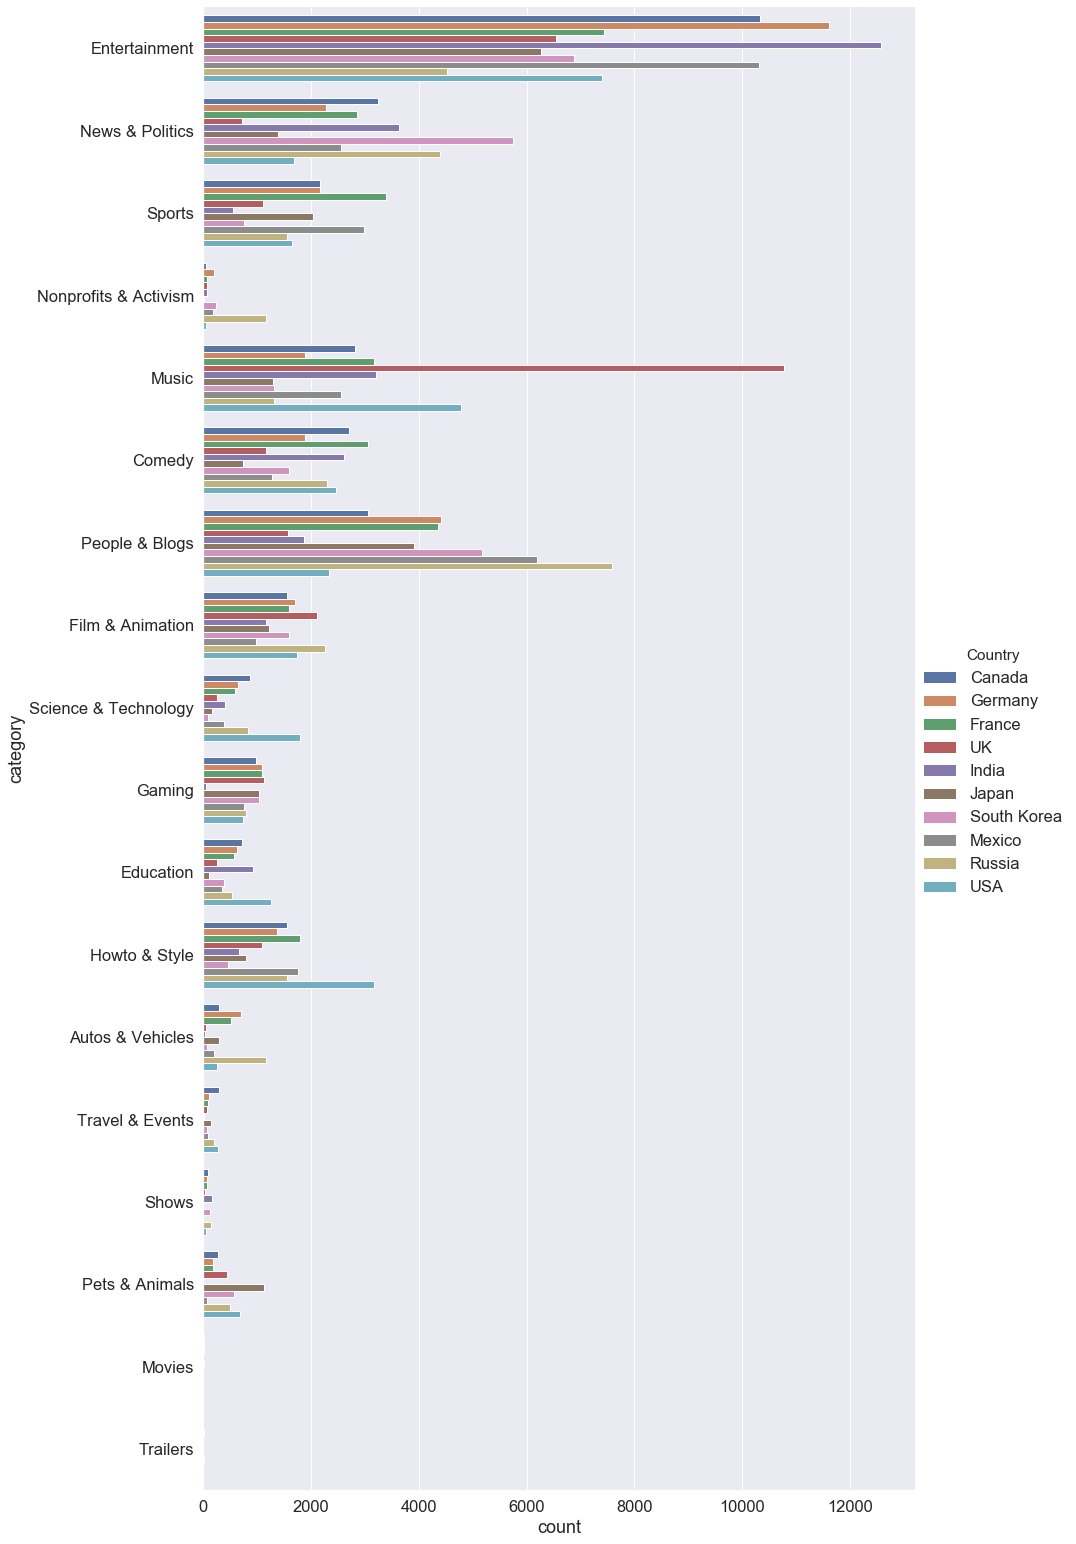

In [105]:
sns.set(font_scale=1.5)
g = sns.catplot(y="category", hue="Country", data=pysqldf('SELECT Country, category, views, STRFTIME("%Y", publish_time) AS Year \
                                                            FROM df_drop WHERE Year = "2018"'), kind="count", aspect=2.7)
g.fig.set_figheight(25)
g.savefig("Review Categories.png")

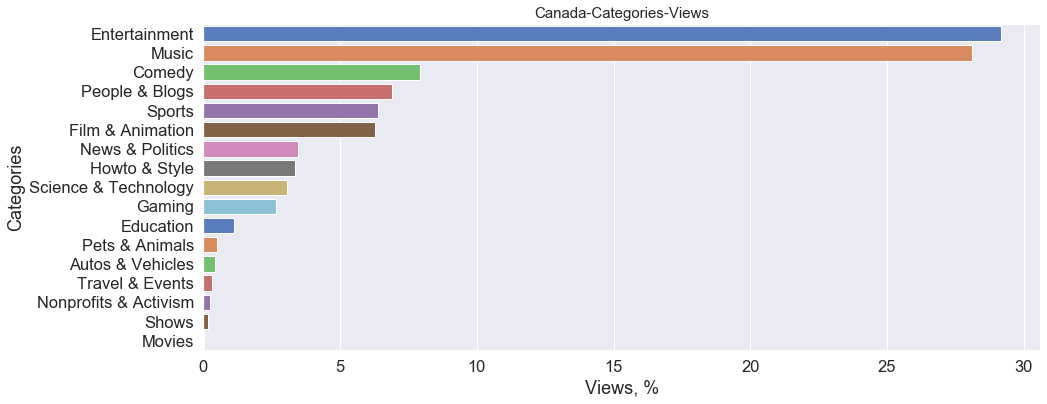

In [11]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "Canada")) as Percent FROM df_drop WHERE Country = "Canada" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Canada-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Canada-Categories-Views.png")

In [12]:
data2 = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop WHERE Country = "Canada")) as Percent FROM df_drop WHERE Country = "Canada" GROUP BY category')
data2

,category,Total,Percent
0,Autos & Vehicles,200066074,0.426653
1,Comedy,3708438785,7.908472
2,Education,531773343,1.134039
3,Entertainment,13671215509,29.154702
4,Film & Animation,2939060844,6.267727
5,Gaming,1241532385,2.647644
6,Howto & Style,1570846611,3.349926
7,Movies,17120490,0.036510
8,Music,13179850194,28.106835
9,News & Politics,1614610043,3.443255


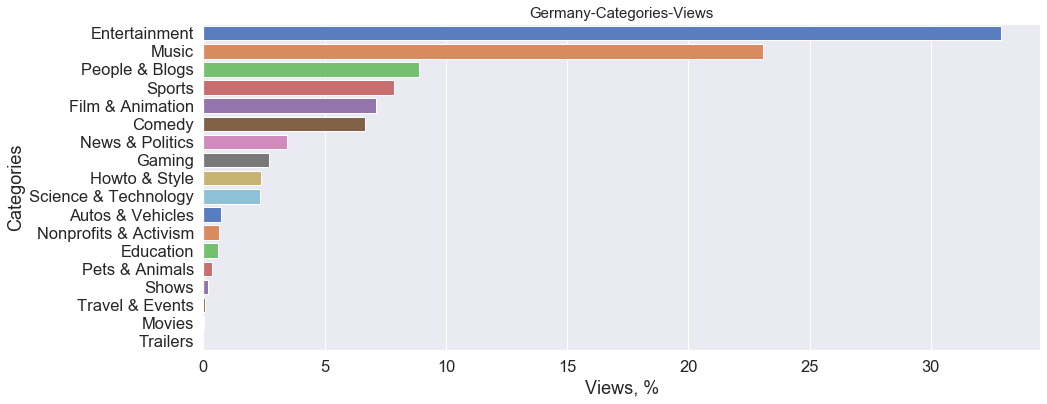

In [13]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "Germany")) as Percent FROM df_drop WHERE Country = "Germany" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Germany-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Germany-Categories-Views.png")

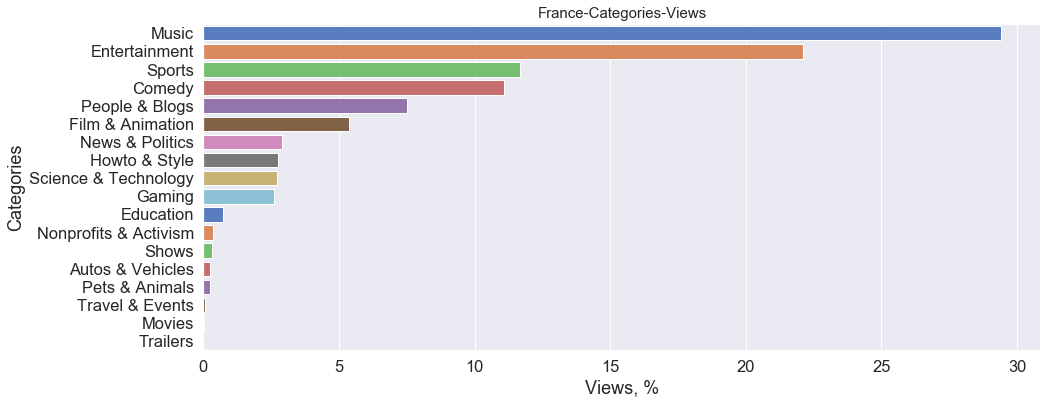

In [14]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "France")) as Percent FROM df_drop WHERE Country = "France" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('France-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("France-Categories-Views.png")

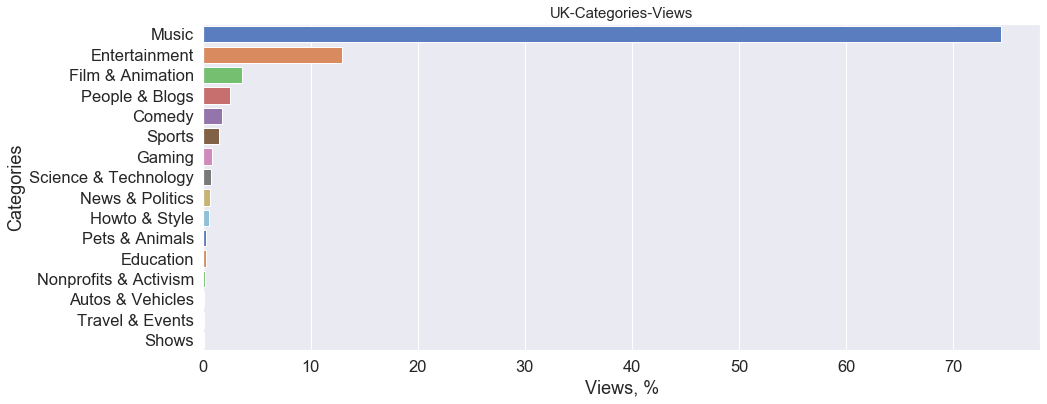

In [15]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "UK")) as Percent FROM df_drop WHERE Country = "UK" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('UK-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("UK-Categories-Views.png")

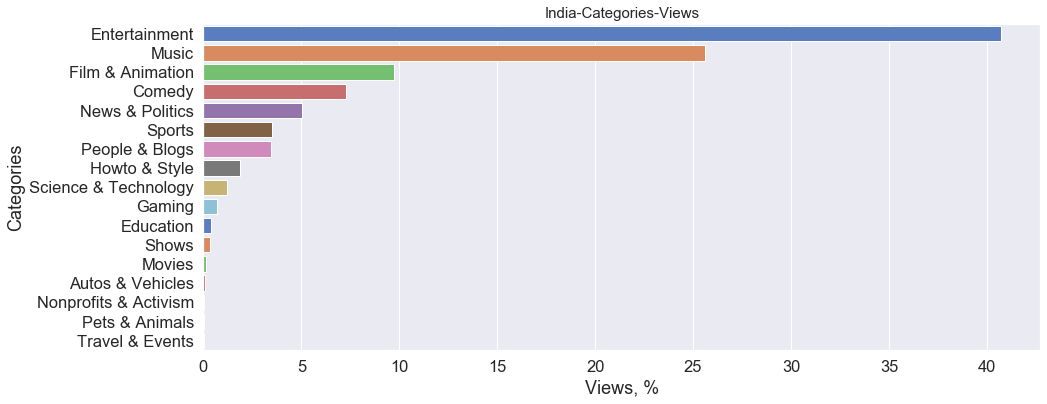

In [16]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "India")) as Percent FROM df_drop WHERE Country = "India" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('India-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("India-Categories-Views.png")

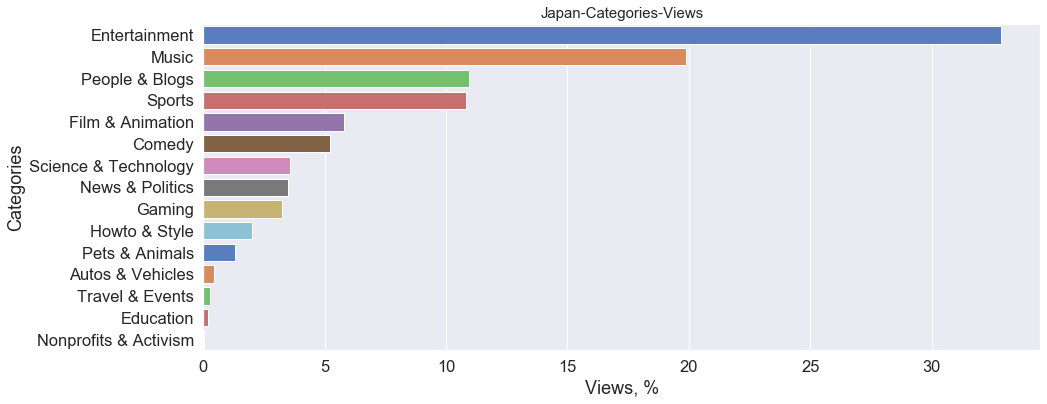

In [17]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "Japan")) as Percent FROM df_drop WHERE Country = "Japan" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Japan-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Japan-Categories-Views.png")

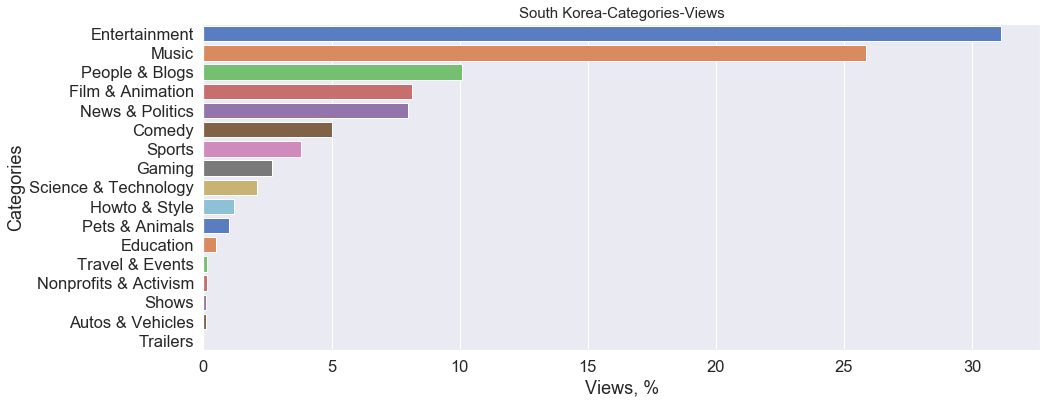

In [18]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "South Korea")) as Percent FROM df_drop WHERE Country = "South Korea" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('South Korea-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("South Korea-Categories-Views.png")

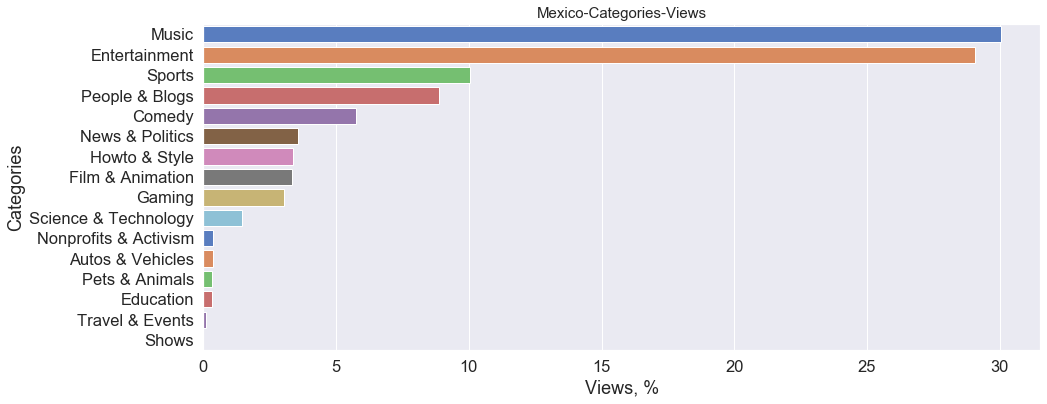

In [19]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "Mexico")) as Percent FROM df_drop WHERE Country = "Mexico" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Mexico-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Mexico-Categories-Views.png")

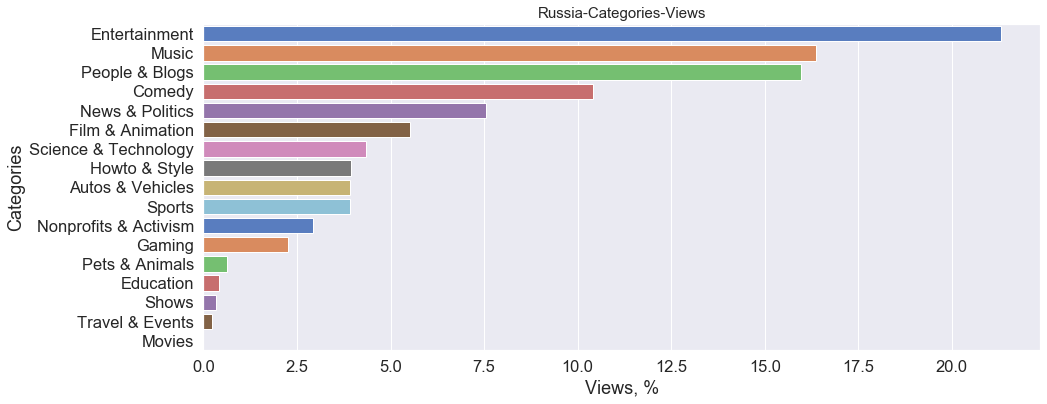

In [20]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "Russia")) as Percent FROM df_drop WHERE Country = "Russia" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Russia-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Russia-Categories-Views.png")

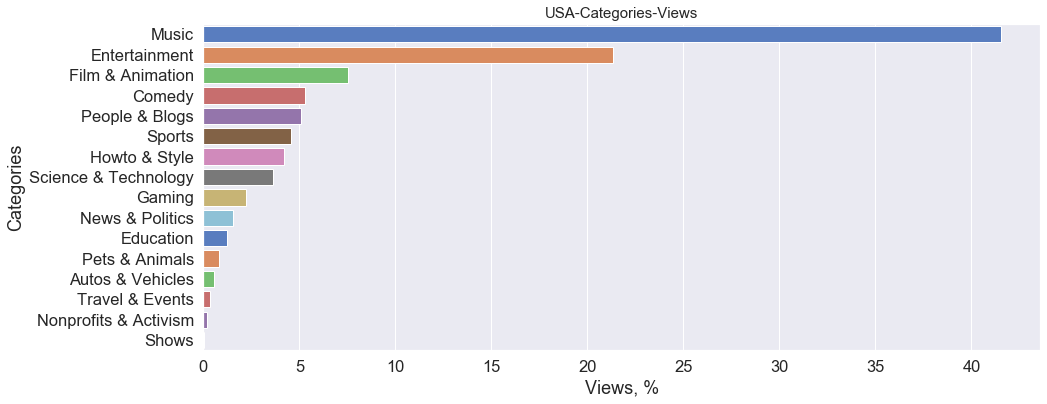

In [21]:
data = pysqldf('SELECT category, SUM(views) as Total, (CAST(SUM(views) AS FLOAT)*100 / (SELECT SUM(views) FROM df_drop \
                WHERE Country = "USA")) as Percent FROM df_drop WHERE Country = "USA" \
                GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('USA-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("USA-Categories-Views.png")

In [22]:
df_drop['publish_time'] = pd.to_datetime(df_drop['publish_time'])
df_drop['publish_time']

0        2017-11-10 17:00:03+00:00
1        2017-11-13 17:00:00+00:00
2        2017-11-12 19:05:24+00:00
3        2017-11-12 18:01:41+00:00
4        2017-11-09 11:04:14+00:00
                    ...           
375937   2018-05-18 13:00:04+00:00
375938   2018-05-18 01:00:06+00:00
375939   2018-05-18 17:34:22+00:00
375940   2018-05-17 17:00:04+00:00
375941   2018-05-17 17:09:38+00:00
Name: publish_time, Length: 375942, dtype: datetime64[ns, UTC]

In [23]:
print(df_drop['publish_time'].min())
print(df_drop['publish_time'].max())

2006-07-23 08:24:11+00:00
2018-06-14 03:40:05+00:00


In [24]:
pysqldf('SELECT MIN(publish_time), MAX(publish_time) FROM df_drop WHERE Country = "Russia"')

,MIN(publish_time),MAX(publish_time)
0,2011-06-20 11:10:09.000000,2018-06-14 00:00:03.000000


In [25]:
pysqldf('SELECT publish_time, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Russia" LIMIT 100')

,publish_time,Year
0,2017-11-13 09:09:31.000000,2017
1,2017-11-13 17:32:11.000000,2017
2,2017-11-13 16:11:31.000000,2017
3,2017-11-13 06:51:10.000000,2017
4,2017-11-13 16:52:36.000000,2017
...,...,...
95,2017-11-13 17:00:01.000000,2017
96,2017-11-13 16:42:03.000000,2017
97,2017-11-13 20:06:09.000000,2017
98,2017-11-12 15:21:18.000000,2017


Text(0, 0.5, 'Views, bln')

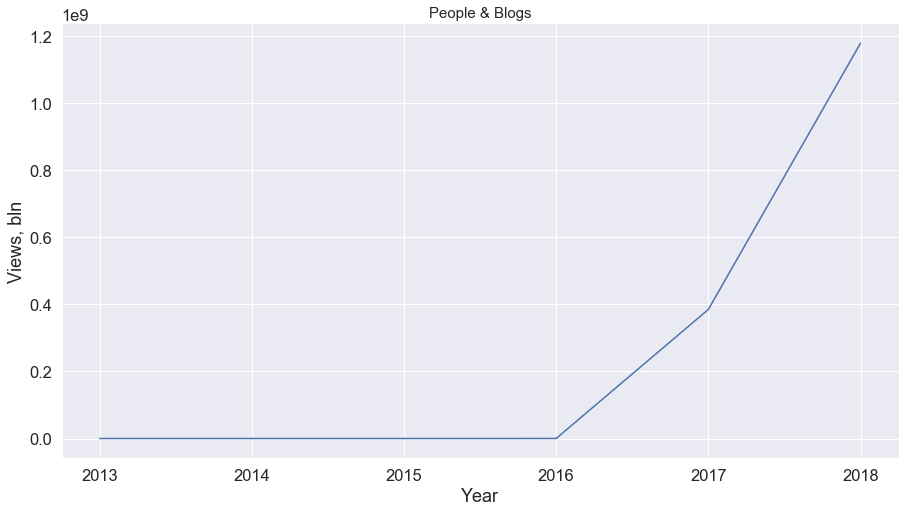

In [31]:
data = pysqldf('SELECT category, STRFTIME("%Y", publish_time) AS Year, SUM(views) FROM df_drop WHERE Country = "Russia" \
            AND category = "People & Blogs" GROUP BY category, Year')
bar, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=data, x='Year', y='SUM(views)')
ax.set_title('People & Blogs', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
#bar.savefig("USA-Categories-Views.png")

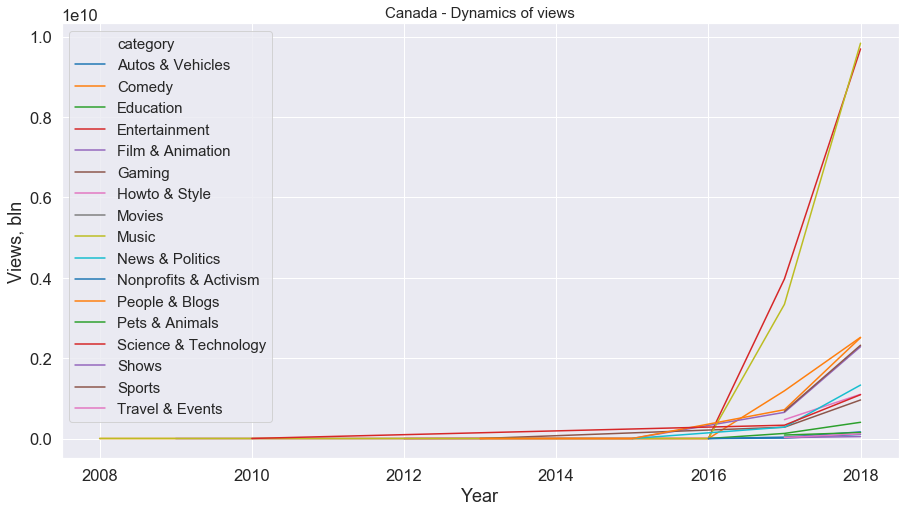

In [80]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "Canada" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10')
ax.set_title('Canada - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 15)
bar.savefig("Canada - Dynamics of views.png")

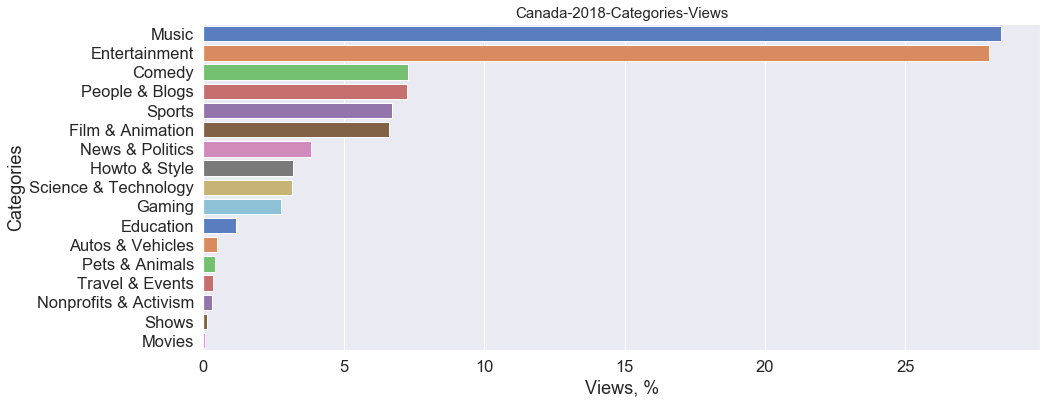

In [78]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Canada" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "Canada" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Canada-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Canada-2018-Categories-Views.png")

In [104]:
pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Canada" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "Canada" AND MYear = "2018" GROUP BY category')

,category,Total,MYear,Percent
0,Autos & Vehicles,165086247,2018,0.476363
1,Comedy,2518974770,2018,7.268607
2,Education,404184334,2018,1.166291
3,Entertainment,9695662542,2018,27.977240
4,Film & Animation,2285316410,2018,6.594376
5,Gaming,959663504,2018,2.769149
6,Howto & Style,1100670882,2018,3.176032
7,Movies,17120490,2018,0.049402
8,Music,9838267244,2018,28.388732
9,News & Politics,1330750691,2018,3.839937


In [75]:
pysqldf('SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Canada" GROUP BY Year) WHERE Year = "2018"')

,V
0,34655536165


In [73]:
pysqldf('SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Canada" GROUP BY Year')

,V,Year
0,1792775,2008
1,264577,2009
2,1997620,2010
3,4057,2012
4,3986792,2013
5,1717181,2014
6,826605,2015
7,2228017,2016
8,12223621280,2017
9,34655536165,2018


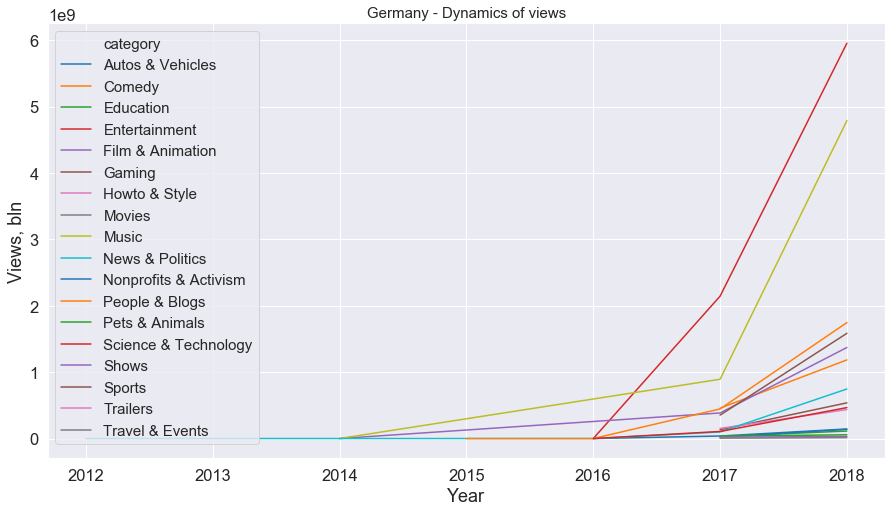

In [81]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "Germany" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10')
ax.set_title('Germany - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 15)
bar.savefig("Germany - Dynamics of views.png")

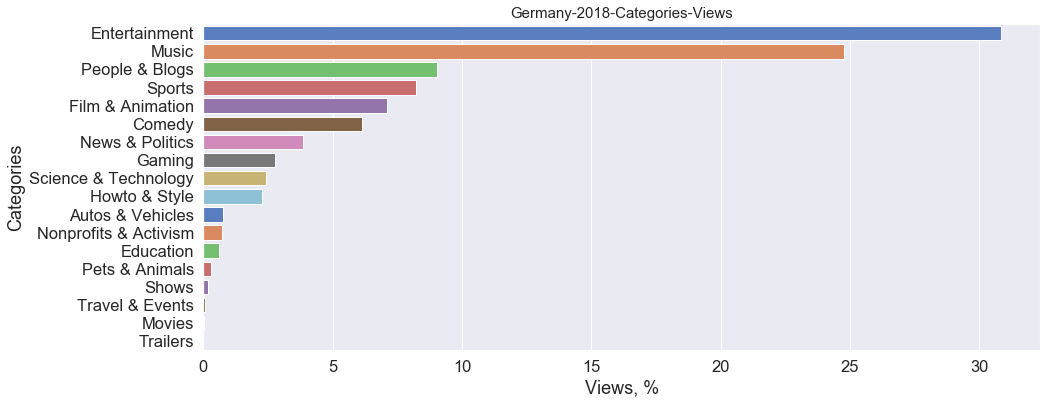

In [82]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Germany" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "Germany" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Germany-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Germany-2018-Categories-Views.png")

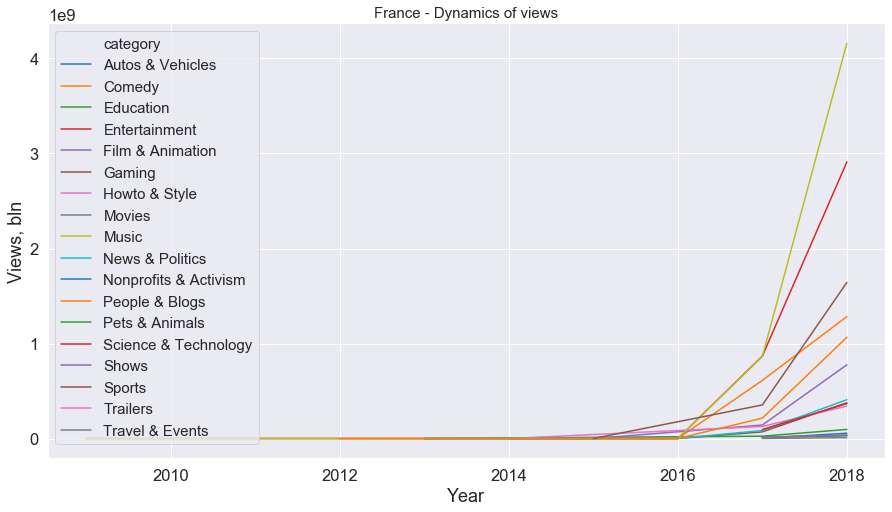

In [83]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "France" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10')
ax.set_title('France - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 15)
bar.savefig("France - Dynamics of views.png")

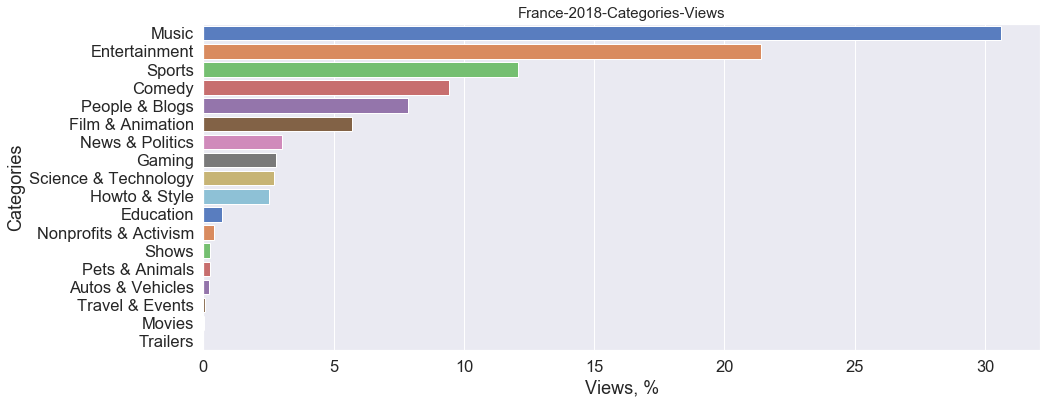

In [84]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "France" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "France" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('France-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("France-2018-Categories-Views.png")

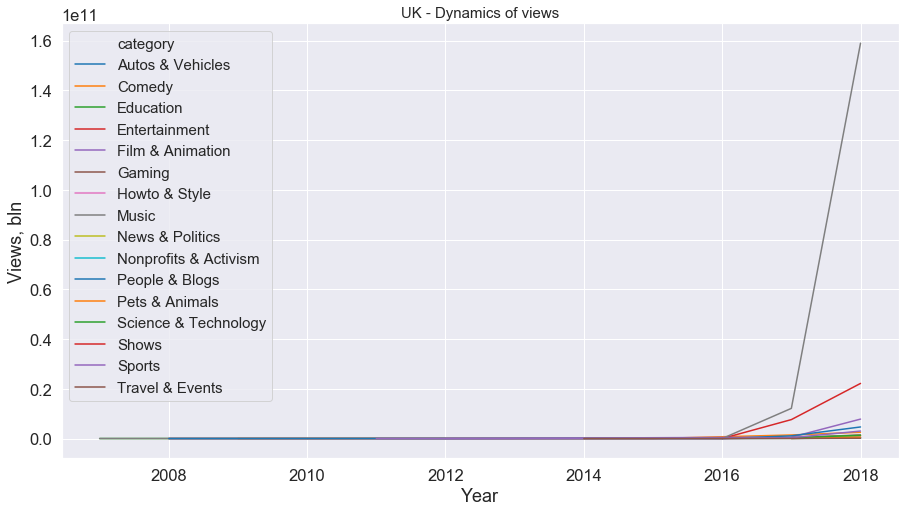

In [85]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "UK" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10')
ax.set_title('UK - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 15)
bar.savefig("UK - Dynamics of views.png")

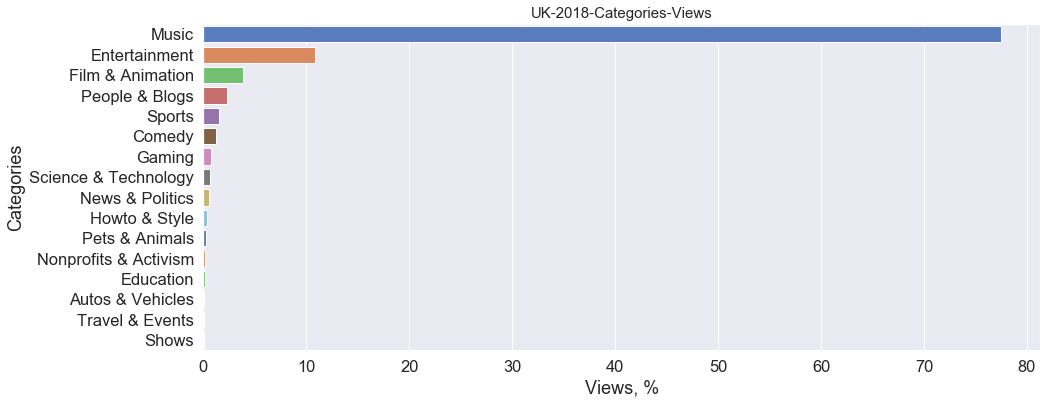

In [86]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "UK" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "UK" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('UK-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("UK-2018-Categories-Views.png")

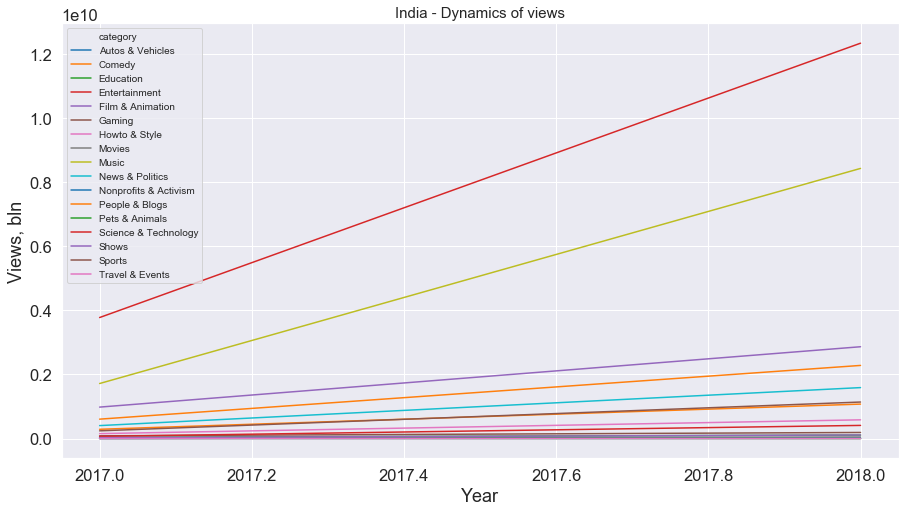

In [91]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "India" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10', legend = 'full')
ax.set_title('India - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 10)
bar.savefig("India - Dynamics of views.png")

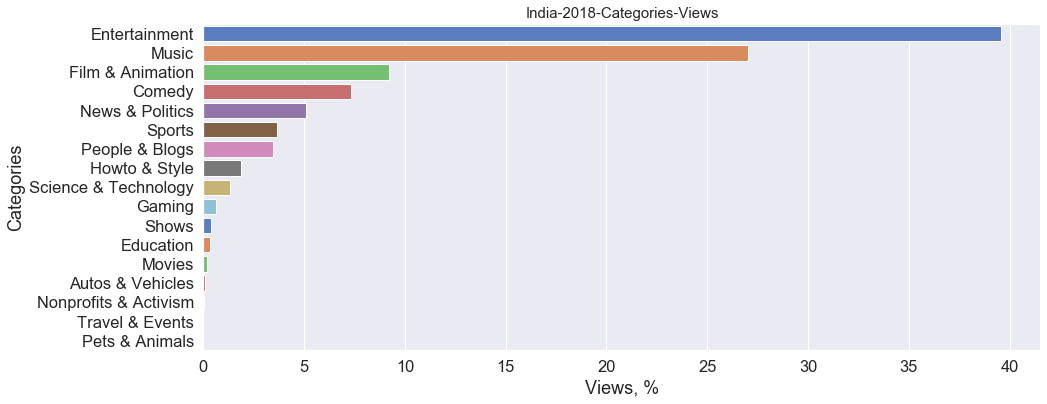

In [88]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "India" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "India" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('India-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("India-2018-Categories-Views.png")

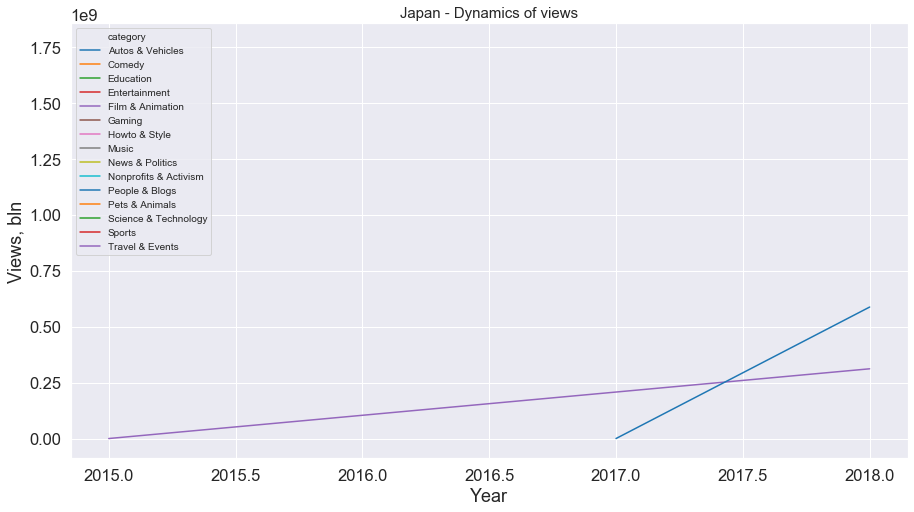

In [92]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "Japan" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10', legend = 'full')
ax.set_title('Japan - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 10)
bar.savefig("Japan - Dynamics of views.png")

In [94]:
pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "Japan" GROUP BY category, Year ORDER BY category')

,category,Year,SUM(views)
0,Autos & Vehicles,2018,23293878
1,Comedy,2018,280973914
2,Education,2018,9706802
3,Entertainment,2018,1766268244
4,Film & Animation,2015,13930
5,Film & Animation,2018,311576842
6,Gaming,2018,173525830
7,Howto & Style,2018,108416992
8,Music,2018,1070344379
9,News & Politics,2018,186286429


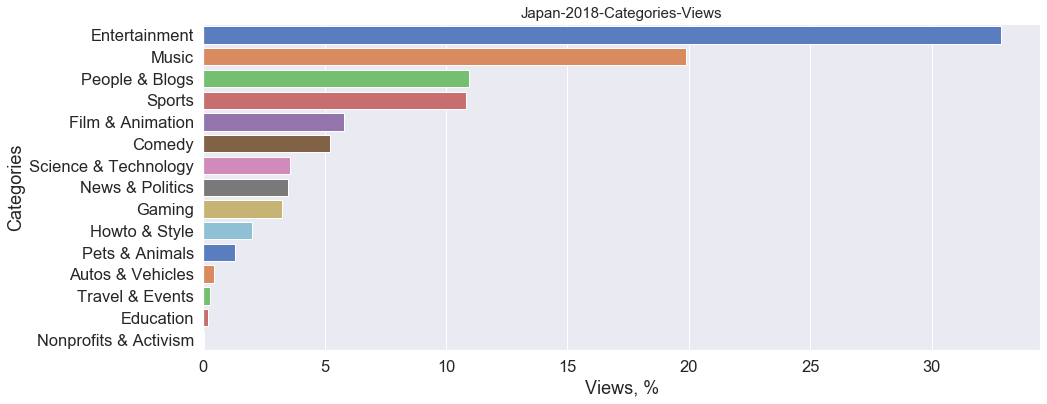

In [93]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Japan" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "Japan" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Japan-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Japan-2018-Categories-Views.png")

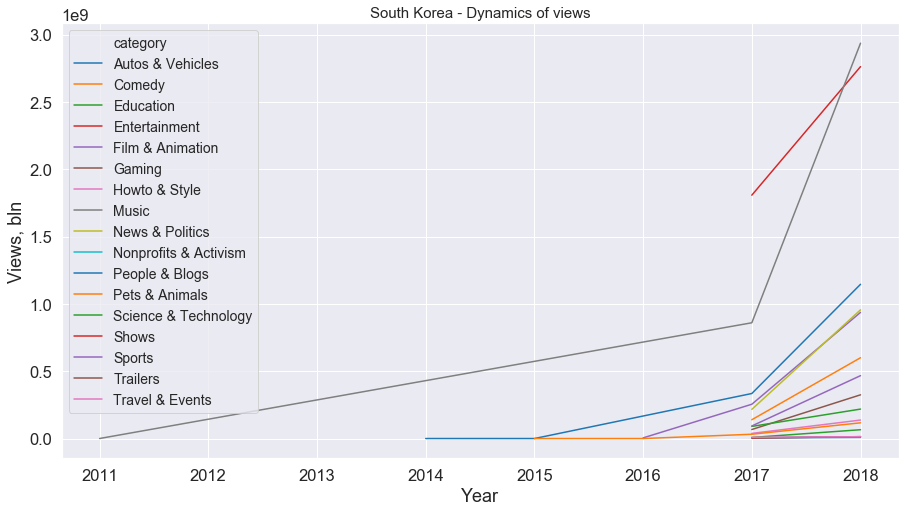

In [106]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "South Korea" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10', legend = 'full')
ax.set_title('South Korea - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 14)
bar.savefig("South Korea - Dynamics of views.png")

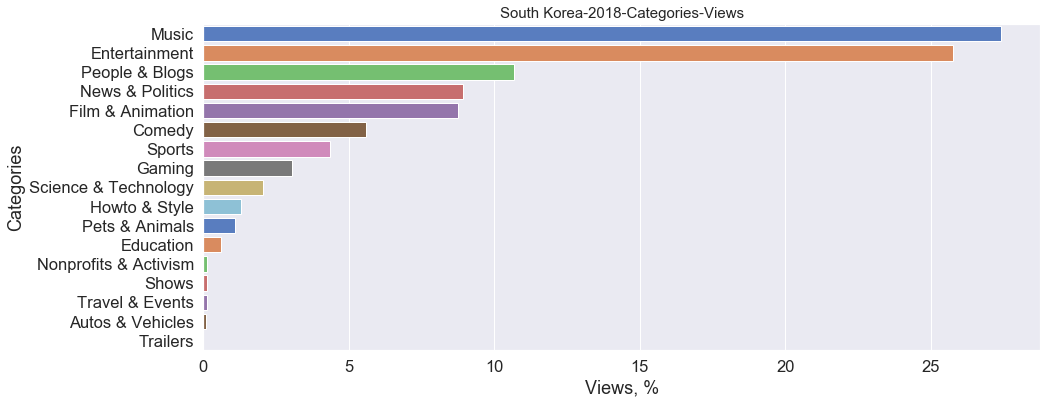

In [96]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "South Korea" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "South Korea" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('South Korea-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("South Korea-2018-Categories-Views.png")

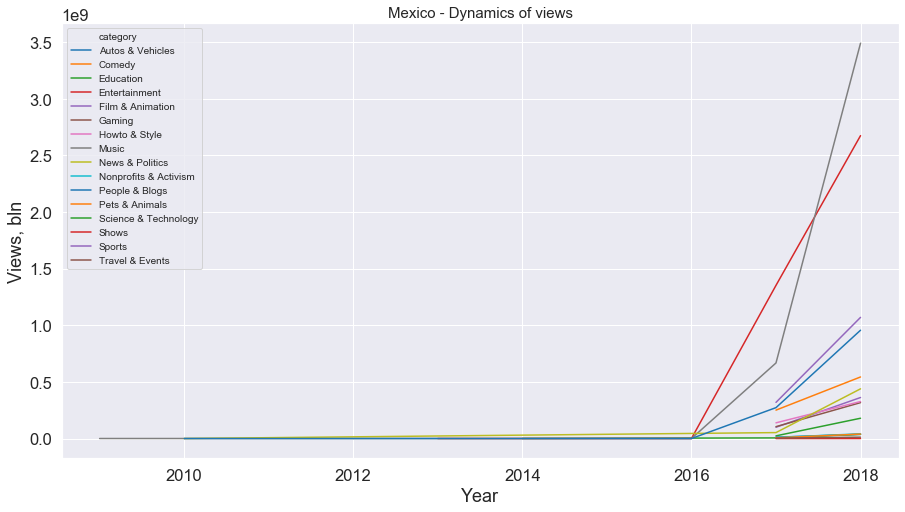

In [97]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "Mexico" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10', legend = 'full')
ax.set_title('Mexico - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 10)
bar.savefig("Mexico - Dynamics of views.png")

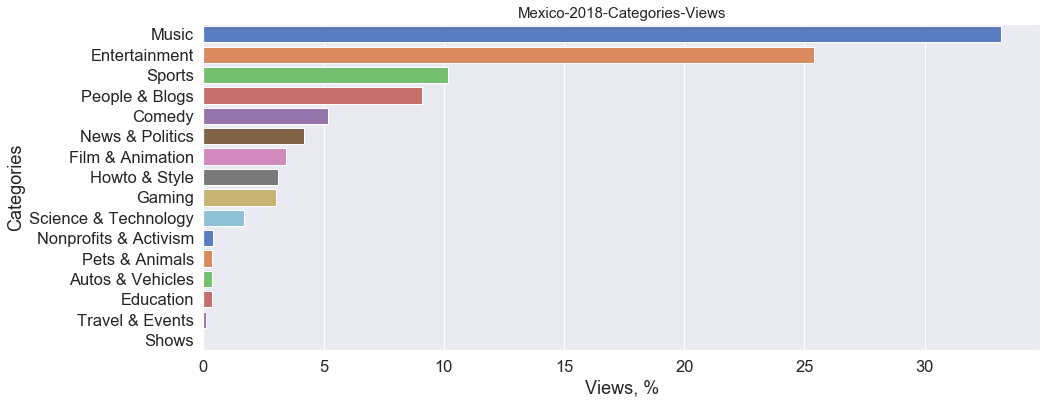

In [98]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Mexico" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "Mexico" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Mexico-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Mexico-2018-Categories-Views.png")

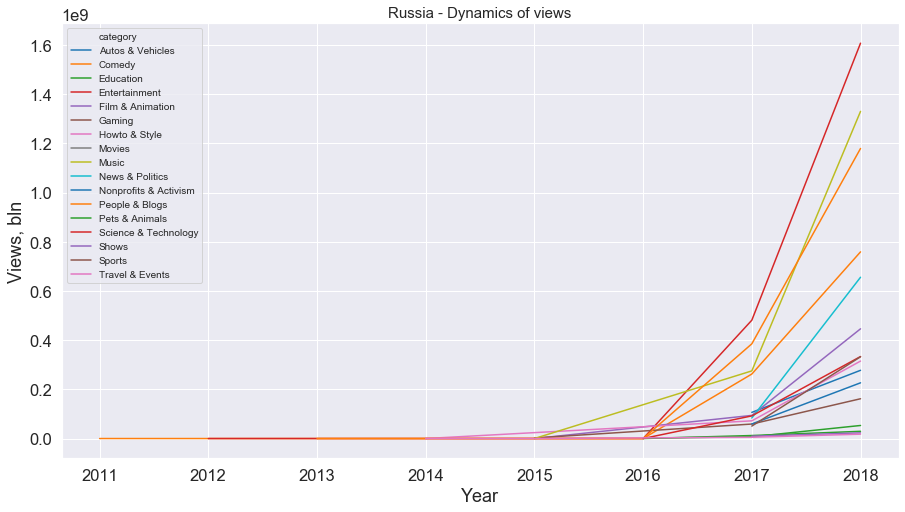

In [99]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "Russia" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10', legend = 'full')
ax.set_title('Russia - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 10)
bar.savefig("Russia - Dynamics of views.png")

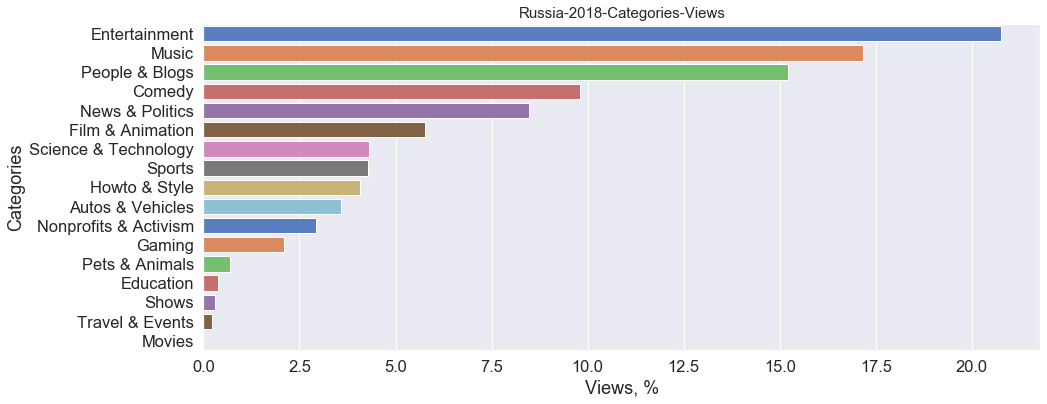

In [100]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "Russia" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "Russia" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('Russia-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("Russia-2018-Categories-Views.png")

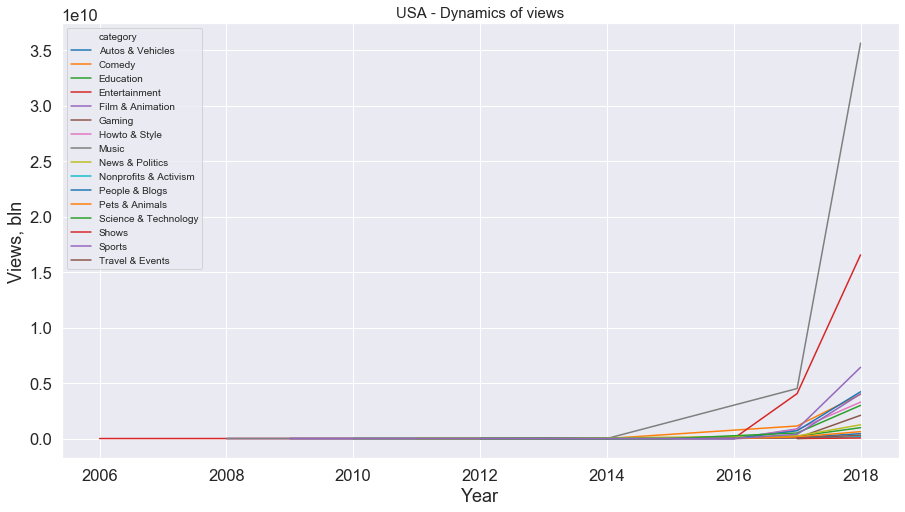

In [101]:
data = pysqldf('SELECT category, CAST(STRFTIME("%Y", publish_time) AS Integer) AS Year, SUM(views) FROM df_drop \
                WHERE Country = "USA" GROUP BY category, Year ORDER BY category')
bar, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(data=data, x='Year', y='SUM(views)', hue = 'category', palette = 'tab10', legend = 'full')
ax.set_title('USA - Dynamics of views', fontsize = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Views, bln')
ax.legend(fontsize = 10)
bar.savefig("USA - Dynamics of views.png")

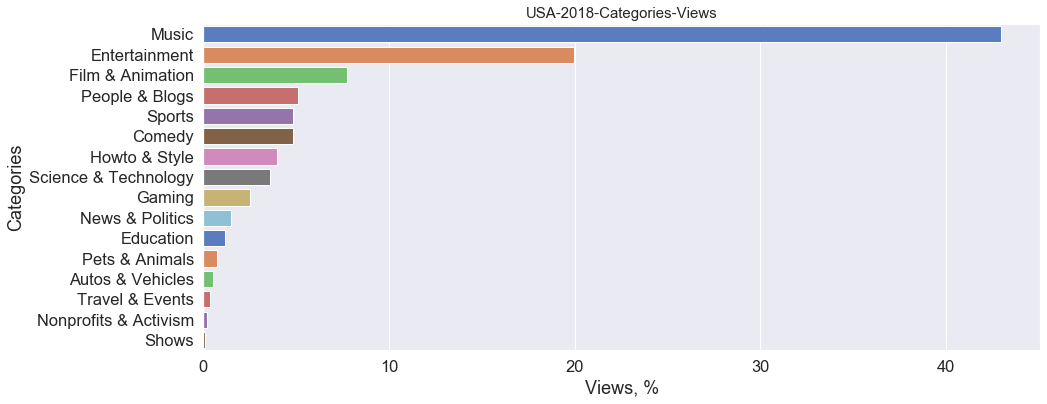

In [102]:
data = pysqldf('SELECT category, SUM(views) AS Total, STRFTIME("%Y", publish_time) AS MYear, \
(CAST(SUM(views) AS FLOAT)*100 / (SELECT V FROM \
(SELECT SUM(views) AS V, STRFTIME("%Y", publish_time) AS Year FROM df_drop WHERE Country = "USA" GROUP BY Year) WHERE Year = "2018")) AS Percent \
FROM df_drop WHERE Country = "USA" AND MYear = "2018" GROUP BY category ORDER BY Percent DESC')
bar, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x='Percent', y='category', data=data, ci=None, palette="muted")
ax.set_title('USA-2018-Categories-Views', fontsize = 15)
ax.set_xlabel('Views, %')
ax.set_ylabel('Categories')
bar.savefig("USA-2018-Categories-Views.png")